In [1]:
# importando as bibliotecas que vamos usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [490]:
# Lendo o arquivos com os dados
df = pd.read_csv(r'base.csv')

In [491]:
# Verificando os campos e vendo se temos campos com valores nulos
df.info()
# Ao todo são 80 campos, sem contar o Id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

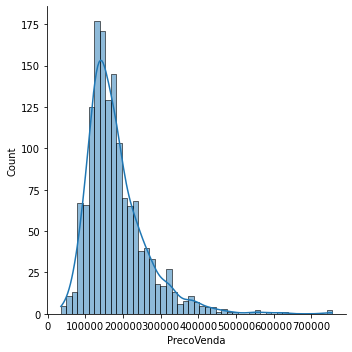

In [492]:
# Verificando a distribuição do PrecoVenda
sns.displot(df['PrecoVenda'], kde = True)
plt.show()

In [493]:
# Verificando os valores nulos e criando uma variável de quantos valores nulos temos
df_null = pd.DataFrame(df.isnull().sum(), columns = ['Quantidade'])
df_null = df_null[df_null['Quantidade'] > 0] 

In [494]:
# Checando o percentual de todas as colunas com valores nulos
df_null['Percent_null'] = (df_null['Quantidade']/1460)*100
df_null

,Quantidade,Percent_null
Fachada,259,17.739726
Beco,1369,93.767123
TipoAlvenaria,8,0.547945
AreaAlvenaria,8,0.547945
AlturaPorao,37,2.534247
CondicaoPorao,37,2.534247
ParedePorao,38,2.602740
TipoAcabPorao1,37,2.534247
TipoAcabPorao2,38,2.602740
InstalacaoEletrica,1,0.068493


In [500]:
Beco,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,TipoAcabPorao2,QualdiadeLareira,LocalGaragem,AcabamentoGaragem,QualidadeGaragem,CondicaoGaragem,QualidadePiscina,QualidadeCerca,Outros
df.Outros.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: Outros, dtype: int64

In [505]:
# Percebendo que as colunas não possuem o NA, vamos verificar se faz sentido o preenchimento com NA:
df[(df.QualidadePiscina.isnull()) & 
   (df.AreaPiscina) > 0]

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda


In [506]:
df[(df.QualdiadeLareira.isnull()) & 
   (df.Lareira) > 0]

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda


In [519]:
df[(df.QualidadeGaragem.isnull()) & 
   (df.AreaGaragem) > 0]

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda


In [522]:
df[(df.AlturaPorao.isnull()) & 
   (df.AreaPorao) > 0]

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda


In [524]:
df[(df.TipoAlvenaria.isnull())]

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
234,235,60,RL,NaN,7851,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NA,NA,NA,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NA,NA,NA,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NA,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NA,NA,NA,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NA,NA,NA,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NA,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NA,NA,NA,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NA,NA,NA,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NA,NA,NA,0,3,2008,WD,Normal,237000


In [526]:
# Visto que os valores nulos podem ser preenchidos com NA, vamos fazê-lo
df['Beco'].fillna(value = 'NA', inplace = True)
df['QualidadePiscina'].fillna(value = 'NA', inplace = True)
df['QualidadeCerca'].fillna(value = 'NA', inplace = True)
df['QualdiadeLareira'].fillna(value = 'NA', inplace = True)
df['Outros'].fillna(value = 'NA', inplace = True)
df['AlturaPorao'].fillna(value = 'NA', inplace = True)
df['CondicaoPorao'].fillna(value = 'NA', inplace = True)
df['ParedePorao'].fillna(value = 'NA', inplace = True)
df['TipoAcabPorao1'].fillna(value = 'NA', inplace = True)
df['TipoAcabPorao2'].fillna(value = 'NA', inplace = True)
df['LocalGaragem'].fillna(value = 'NA', inplace = True)
df['AcabamentoGaragem'].fillna(value = 'NA', inplace = True)
df['QualidadeGaragem'].fillna(value = 'NA', inplace = True)
df['CondicaoGaragem'].fillna(value = 'NA', inplace = True)
# As variáveis restantes como: TipoAlvenaria, AreaAlvenaria, InstalacaoEletrica, Fachada e AnoGaragem 
# não faz sentido o preenchimento com NA

In [527]:
# Checando se foi preenchido
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  1460 non-null   object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

In [528]:
# Plotando a correlação das variáveis contínuas e vendo quais tem maior correlação com o PrecoVenda
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,Id,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,AnoGaragem,CarrosGaragem,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,PrecoVenda
Id,1.00,0.01,-0.01,-0.03,-0.03,0.01,-0.01,-0.02,-0.05,-0.01,-0.01,-0.01,-0.02,0.01,0.01,-0.04,0.01,0.00,-0.02,0.01,0.01,0.04,0.00,0.03,-0.02,0.00,0.02,0.02,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00,-0.02
ClasseImovel,0.01,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,0.09,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
Fachada,-0.01,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.04,0.40,0.10,-0.01,0.20,0.05,0.26,-0.01,0.35,0.27,0.07,0.29,0.34,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01,0.35
TamanhoLote,-0.03,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,-0.02,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
Qualidade,-0.03,0.03,0.25,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,0.31,0.54,0.48,0.30,-0.03,0.59,0.11,-0.04,0.55,0.27,0.10,-0.18,0.43,0.40,0.55,0.60,0.56,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
Condicao,0.01,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,-0.14,-0.17,-0.14,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.09,-0.06,-0.02,-0.32,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
AnoConstrucao,-0.01,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,-0.05,0.15,0.39,0.28,0.01,-0.18,0.20,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.10,0.15,0.83,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
AnoReforma,-0.02,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,-0.15,0.19,0.11,0.64,0.42,0.37,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
AreaAlvenaria,-0.05,0.02,0.19,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.09,0.03,0.28,0.20,0.10,-0.04,0.28,0.25,0.25,0.36,0.37,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.48
AreaAcabPorao1,-0.01,-0.07,0.23,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,-0.08,0.04,0.26,0.15,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39


In [529]:
# Criando uma funcao para fazer um plot de dispersão
def scatter(y):
    sns.scatterplot(x = 'PrecoVenda', y = y, data = df)
    plt.show()

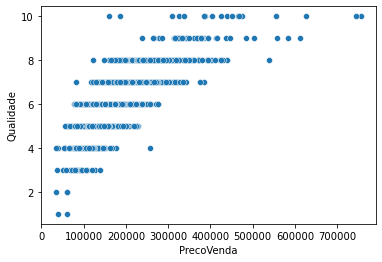

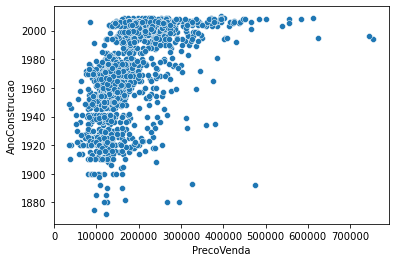

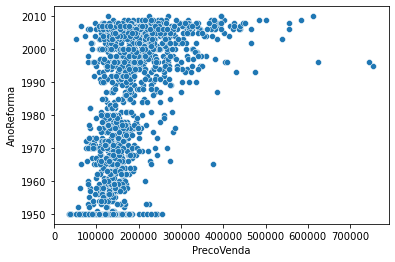

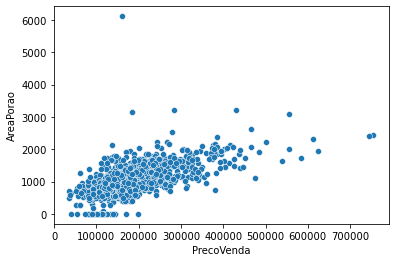

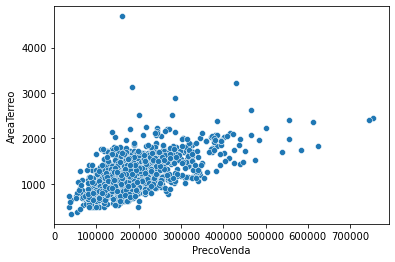

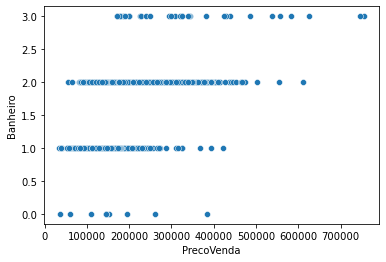

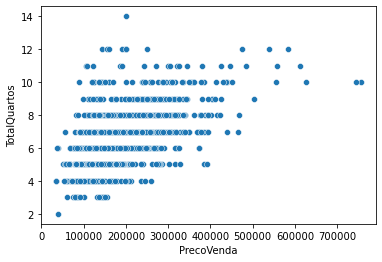

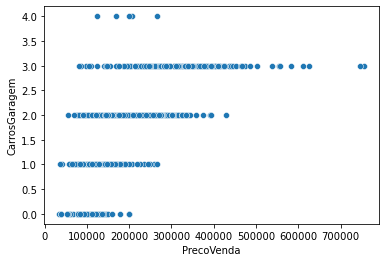

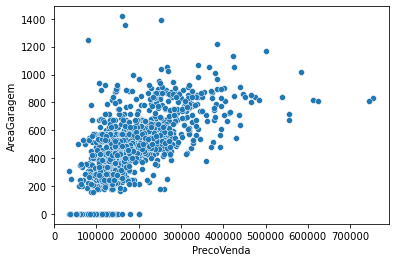

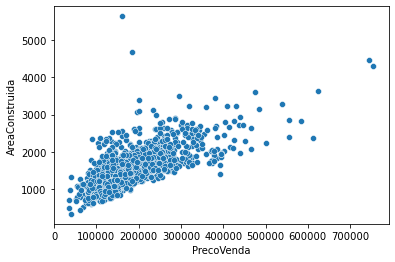

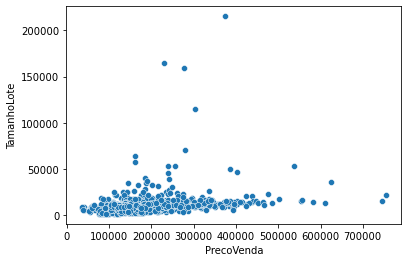

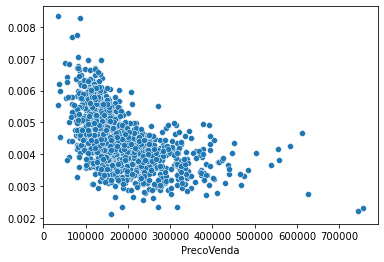

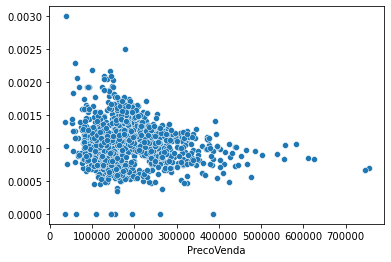

In [530]:
# Plotando as variáveis que possuem uma correlação com PrecoVenda acima de 0.5 ou menor que -0.5 
scatter('Qualidade')
scatter('AnoConstrucao')
scatter('AnoReforma')
scatter('AreaPorao')
scatter('AreaTerreo')
scatter('Banheiro')
scatter('TotalQuartos')
scatter('CarrosGaragem')
scatter('AreaGaragem')
scatter('AreaConstruida')
scatter('TamanhoLote')
scatter((df['TotalQuartos']/df['AreaConstruida']))
scatter((df['Banheiro']/df['AreaConstruida']))

In [531]:
# Fazendo transformação logarítmica com a variável PrecoVenda para diminuirmos o range de preço
df['LogPrecoVenda'] = pd.DataFrame(np.log(df['PrecoVenda']))

In [532]:
# Checando a correlação com a variável LogPrecoVenda
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,Id,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,AnoGaragem,CarrosGaragem,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,PrecoVenda,LogPrecoVenda
Id,1.00,0.01,-0.01,-0.03,-0.03,0.01,-0.01,-0.02,-0.05,-0.01,-0.01,-0.01,-0.02,0.01,0.01,-0.04,0.01,0.00,-0.02,0.01,0.01,0.04,0.00,0.03,-0.02,0.00,0.02,0.02,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00,-0.02,-0.02
ClasseImovel,0.01,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,0.09,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08,-0.07
Fachada,-0.01,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.04,0.40,0.10,-0.01,0.20,0.05,0.26,-0.01,0.35,0.27,0.07,0.29,0.34,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01,0.35,0.36
TamanhoLote,-0.03,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,-0.02,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26,0.26
Qualidade,-0.03,0.03,0.25,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,0.31,0.54,0.48,0.30,-0.03,0.59,0.11,-0.04,0.55,0.27,0.10,-0.18,0.43,0.40,0.55,0.60,0.56,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79,0.82
Condicao,0.01,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,-0.14,-0.17,-0.14,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.09,-0.06,-0.02,-0.32,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08,-0.04
AnoConstrucao,-0.01,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,-0.05,0.15,0.39,0.28,0.01,-0.18,0.20,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.10,0.15,0.83,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52,0.59
AnoReforma,-0.02,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,-0.15,0.19,0.11,0.64,0.42,0.37,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51,0.57
AreaAlvenaria,-0.05,0.02,0.19,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.09,0.03,0.28,0.20,0.10,-0.04,0.28,0.25,0.25,0.36,0.37,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.48,0.43
AreaAcabPorao1,-0.01,-0.07,0.23,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,-0.08,0.04,0.26,0.15,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39,0.37


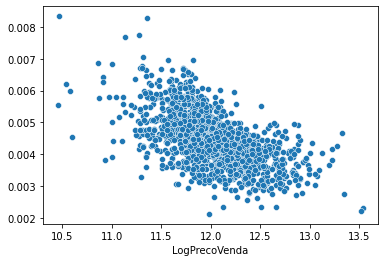

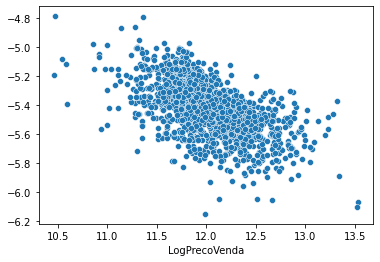

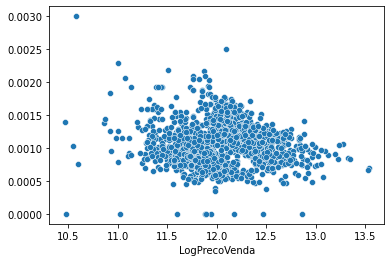

C:\Users\corpc34530146\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


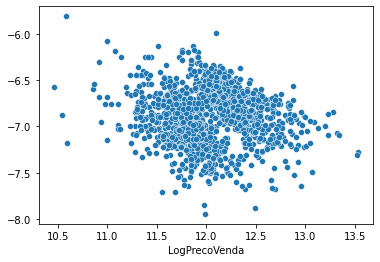

C:\Users\corpc34530146\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PrecoVenda,LogPrecoVenda,QuartosPerArea,LogQuartosPerArea,BanheiroPerArea,LogBanheiroPerArea
PrecoVenda,1.00,0.95,-0.53,-0.54,-0.11,-0.11
LogPrecoVenda,0.95,1.00,-0.58,-0.58,-0.09,-0.09
QuartosPerArea,-0.53,-0.58,1.00,0.99,0.20,0.22
LogQuartosPerArea,-0.54,-0.58,0.99,1.00,0.21,0.23
BanheiroPerArea,-0.11,-0.09,0.20,0.21,1.00,0.98
LogBanheiroPerArea,-0.11,-0.09,0.22,0.23,0.98,1.00


In [533]:
# As variáveis TotalQuartos/AreaConstruida e Banheiro/AreaConstruida parecem bastante interessantes, vamos fazer um plot com a LogPrecoVenda:
sns.scatterplot(x = 'LogPrecoVenda', y = (df['TotalQuartos']/df['AreaConstruida']), data = df)
plt.show()
sns.scatterplot(x = 'LogPrecoVenda', y = np.log(df['TotalQuartos']/df['AreaConstruida']), data = df)
plt.show()
sns.scatterplot(x = 'LogPrecoVenda', y = (df['Banheiro']/df['AreaConstruida']), data = df)
plt.show()
sns.scatterplot(x = 'LogPrecoVenda', y = np.log(df['Banheiro']/df['AreaConstruida']), data = df)
plt.show()
# Vamos ver também a correlação entre elas
df['QuartosPerArea'] = df['TotalQuartos']/df['AreaConstruida']
df['LogQuartosPerArea'] = pd.DataFrame(np.log(df['QuartosPerArea']))
df['BanheiroPerArea'] = df['Banheiro']/df['AreaConstruida']
df['LogBanheiroPerArea'] = pd.DataFrame(np.log(df['BanheiroPerArea']))
corr = df[['PrecoVenda', 'LogPrecoVenda', 'QuartosPerArea', 'LogQuartosPerArea', 'BanheiroPerArea', 'LogBanheiroPerArea']].corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

In [536]:
# Neste caso, a feature de QuartosPerArea parece mais interessante do que a de BanheiroPerArea

In [537]:
# Checando os dados categóricos
df[['Rua','FormaProp','PlanoProp','Servicos','ConfigLote','InclinacaoLote','Bairro',
    'Estrada1','Estrada2','TipoHabitacao','EstiloHabitacao','TipoTelhado','MaterialTelhado',
    'Exterior1','Exterior2','TipoAlvenaria','QualidadeCobertura','CondicaoExterna',
    'TipoFundacao','AlturaPorao','CondicaoPorao','ParedePorao','TipoAcabPorao1','TipoAcabPorao2',
    'Aquecimento','QualidadeAquecimento','ArCentral','InstalacaoEletrica','QualidadeCozinha',
    'Funcionalidade','LocalGaragem','AcabamentoGaragem','QualidadeGaragem','CondicaoGaragem',
    'EntradaPavimentada', 'TipoVenda','CondicaoVenda']].head(5)

,Rua,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,TipoAcabPorao2,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,QualidadeCozinha,Funcionalidade,LocalGaragem,AcabamentoGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,TipoVenda,CondicaoVenda
0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [538]:
# Criando uma função para fazer um plot de boxplot para ver a distribuição das variáveis categóricas
# com relação ao PrecoVenda e/ou LogPrecoVenda
def box(y):
    sns.boxplot(x = 'LogPrecoVenda', y = y, data = df)
    plt.show()

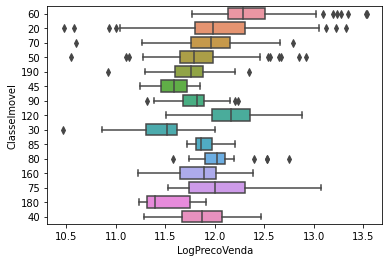

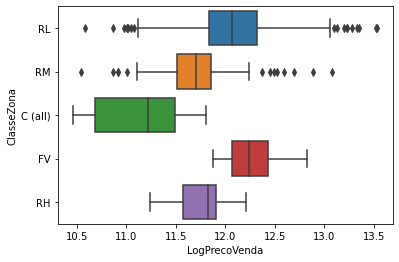

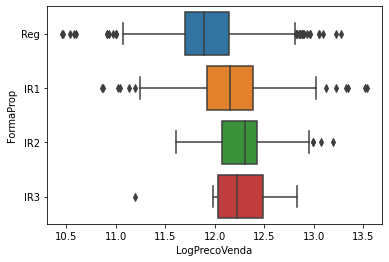

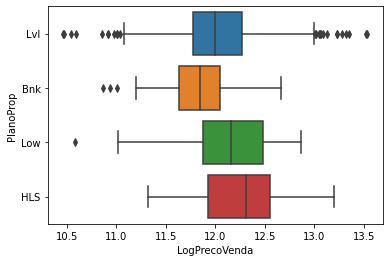

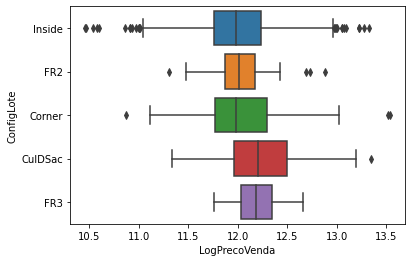

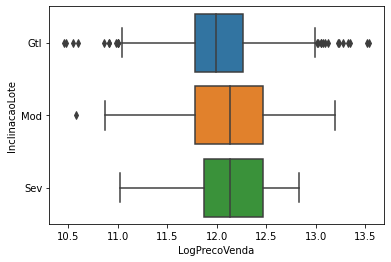

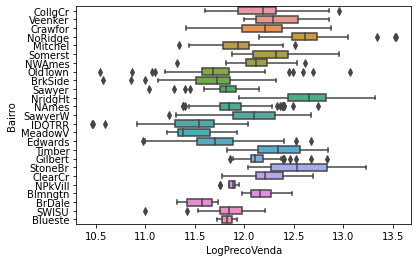

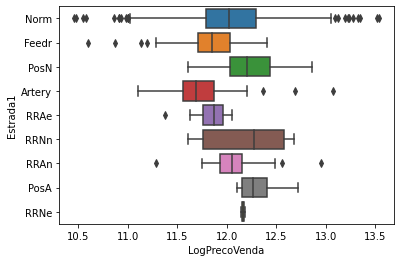

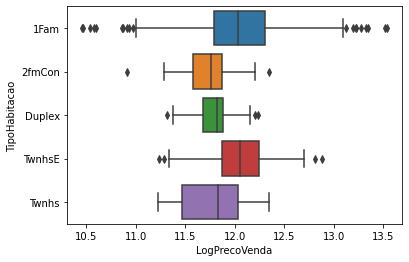

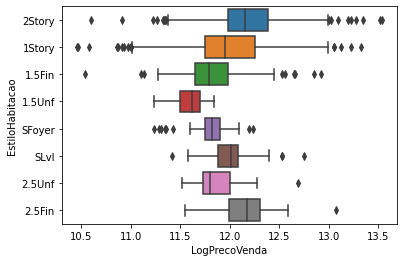

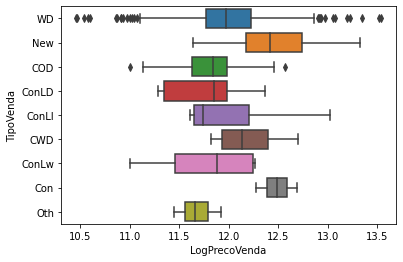

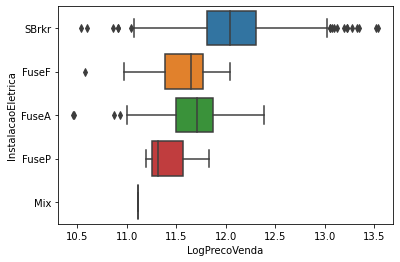

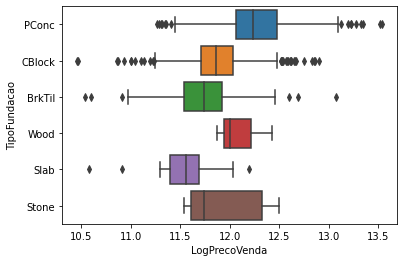

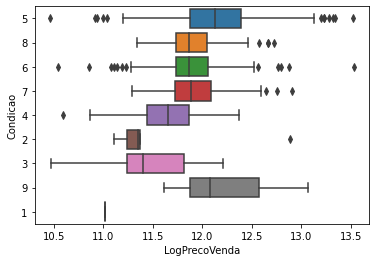

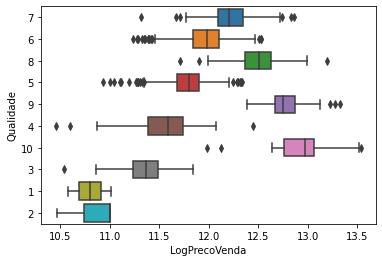

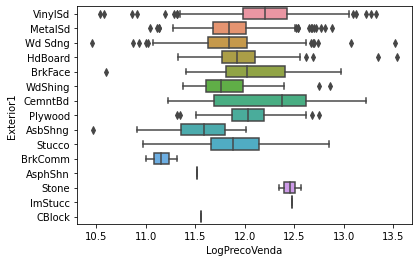

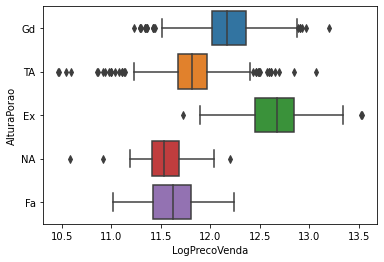

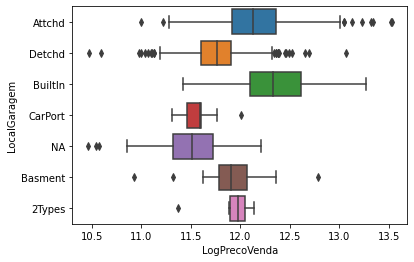

In [539]:
box(df['ClasseImovel'].astype(str))
box(df['ClasseZona'])
box(df['FormaProp'])
box(df['PlanoProp'])
box(df['ConfigLote'])
box(df['InclinacaoLote'])
box(df['Bairro'])
box(df['Estrada1'])
box(df['TipoHabitacao'])
box(df['EstiloHabitacao'])
box(df['TipoVenda'])
box(df['InstalacaoEletrica'])
box(df['TipoFundacao'])
box(df['Condicao'].astype(str))
box(df['Qualidade'].astype(str))
box(df['Exterior1'])
box(df['AlturaPorao'].astype(str))
box(df['LocalGaragem'])

In [540]:
# Fazendo alguns counts para ver a distribuição pela quantidade
df.EstiloHabitacao.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: EstiloHabitacao, dtype: int64

In [395]:
# Variáveis categóricas para utilizar:
# ClasseImovel, ClasseZona, Bairro, Estrada1, Qualidade, EstiloHabitacao, InstalacaoEletrica, TipoFundacao, Exterior1, AlturaPorao 

In [541]:
# Pegando só os valores de CondicaoVenda = Normal para diminuir ruídos 
df_regre = df[df['CondicaoVenda'] == 'Normal']

In [542]:
# Criando um DF só com as variáveis contínuas para verificar correlação
df_corr = df_regre[['AreaConstruida','PrecoVenda','LogPrecoVenda', 
                     'CarrosGaragem','AreaTerreo', 'LogQuartosPerArea',
                     'QuartosPerArea', 'BanheiroPerArea', 'LogBanheiroPerArea'
                   ]]

In [543]:
corr = df_corr.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,AreaConstruida,PrecoVenda,LogPrecoVenda,CarrosGaragem,AreaTerreo,LogQuartosPerArea,QuartosPerArea,BanheiroPerArea,LogBanheiroPerArea
AreaConstruida,1.00,0.74,0.73,0.47,0.52,-0.65,-0.65,-0.31,-0.33
PrecoVenda,0.74,1.00,0.95,0.63,0.61,-0.58,-0.56,-0.14,-0.12
LogPrecoVenda,0.73,0.95,1.00,0.66,0.60,-0.60,-0.59,-0.13,-0.12
CarrosGaragem,0.47,0.63,0.66,1.00,0.41,-0.39,-0.39,0.02,0.03
AreaTerreo,0.52,0.61,0.60,0.41,1.00,-0.41,-0.41,-0.14,-0.14
LogQuartosPerArea,-0.65,-0.58,-0.60,-0.39,-0.41,1.00,0.99,0.25,0.24
QuartosPerArea,-0.65,-0.56,-0.59,-0.39,-0.41,0.99,1.00,0.25,0.24
BanheiroPerArea,-0.31,-0.14,-0.13,0.02,-0.14,0.25,0.25,1.00,0.98
LogBanheiroPerArea,-0.33,-0.12,-0.12,0.03,-0.14,0.24,0.24,0.98,1.00


In [544]:
#Verificando as variáveis categóricas que iremos utilizar
df_regre[['ClasseImovel', 'ClasseZona', 'Bairro', 'Estrada1', 'Qualidade', 'EstiloHabitacao', 'InstalacaoEletrica', 'TipoFundacao', 'Exterior1', 'AlturaPorao' ]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ClasseImovel        1198 non-null   int64 
 1   ClasseZona          1198 non-null   object
 2   Bairro              1198 non-null   object
 3   Estrada1            1198 non-null   object
 4   Qualidade           1198 non-null   int64 
 5   EstiloHabitacao     1198 non-null   object
 6   InstalacaoEletrica  1197 non-null   object
 7   TipoFundacao        1198 non-null   object
 8   Exterior1           1198 non-null   object
 9   AlturaPorao         1198 non-null   object
dtypes: int64(2), object(8)
memory usage: 103.0+ KB


In [545]:
df_regre.InstalacaoEletrica.mode()

0    SBrkr
dtype: object

In [548]:
# Colocando os valores nulos da InstalacaoEletrica como a moda
df_regre.InstalacaoEletrica.fillna(value = 'SBrkr', inplace = True)

In [552]:
# Fazendo o modelo de regressão linear múltipla:
mod = smf.ols(formula = 'LogPrecoVenda ~ Qualidade + Bairro + AlturaPorao + np.log(AreaConstruida) + Exterior1  + LogQuartosPerArea', data = df_regre)
res = mod.fit()
print(res.summary(yname = 'LogPrecoVenda'))

                            OLS Regression Results                            
Dep. Variable:          LogPrecoVenda   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     156.9
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:39:50   Log-Likelihood:                 666.54
No. Observations:                1198   AIC:                            -1243.
Df Residuals:                    1153   BIC:                            -1014.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7

In [557]:
# importando as libs para o próximo passo
# Lib para separar os dados
from sklearn.model_selection import train_test_split

# Libs para construir o modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [558]:
df.columns

Index(['Id', 'ClasseImovel', 'ClasseZona', 'Fachada', 'TamanhoLote', 'Rua',
       'Beco', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote',
       'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao',
       'EstiloHabitacao', 'Qualidade', 'Condicao', 'AnoConstrucao',
       'AnoReforma', 'TipoTelhado', 'MaterialTelhado', 'Exterior1',
       'Exterior2', 'TipoAlvenaria', 'AreaAlvenaria', 'QualidadeCobertura',
       'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao',
       'ParedePorao', 'TipoAcabPorao1', 'AreaAcabPorao1', 'TipoAcabPorao2',
       'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'Aquecimento',
       'QualidadeAquecimento', 'ArCentral', 'InstalacaoEletrica', 'AreaTerreo',
       'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao',
       'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr',
       'QualidadeCozinha', 'TotalQuartos', 'Funcionalidade', 'Lareira',
       'QualdiadeLareira', 'LocalGaragem'

In [559]:
# Separando os dados em treino, teste e validação
X = df[['ClasseImovel', 'ClasseZona', 'Fachada', 'TamanhoLote', 'Rua',
       'Beco', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote',
       'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao',
       'EstiloHabitacao', 'Qualidade', 'Condicao', 'AnoConstrucao',
       'AnoReforma', 'TipoTelhado', 'MaterialTelhado', 'Exterior1',
       'Exterior2', 'TipoAlvenaria', 'AreaAlvenaria', 'QualidadeCobertura',
       'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao',
       'ParedePorao', 'TipoAcabPorao1', 'AreaAcabPorao1', 'TipoAcabPorao2',
       'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'Aquecimento',
       'QualidadeAquecimento', 'ArCentral', 'InstalacaoEletrica', 'AreaTerreo',
       'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao',
       'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr',
       'QualidadeCozinha', 'TotalQuartos', 'Funcionalidade', 'Lareira',
       'QualdiadeLareira', 'LocalGaragem', 'AnoGaragem', 'AcabamentoGaragem',
       'CarrosGaragem', 'AreaGaragem', 'QualidadeGaragem', 'CondicaoGaragem',
       'EntradaPavimentada', 'AreaDeck', 'AreaVarandaAberta',
       'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre',
       'AreaPiscina', 'QualidadePiscina', 'QualidadeCerca', 'Outros',
       'ValorOutros', 'MesVenda', 'AnoVenda', 'TipoVenda', 'CondicaoVenda',
       'QuartosPerArea', 'LogQuartosPerArea','BanheiroPerArea', 'LogBanheiroPerArea'
      ]]
y = df[['LogPrecoVenda']]

# Fazendo a primeira separação em 0.70 treino e 0.30 teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size=0.30, random_state=42)

# Fazendo a segunda separação do teste em 0.5 teste e 0.5 validacao
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, train_size = 0.5, test_size = 0.5, random_state = 42)

In [560]:
# Importando a lib para preencher valores nulos da tabela
from sklearn.impute import SimpleImputer

In [598]:
# Separando as variáveis categóricas e as variáveis contínuas
X_train_categ = X_train[['ClasseImovel', 'ClasseZona', 'Rua', 'Beco',
                         'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote',
                         'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao',
                         'Qualidade', 'Condicao', 'TipoTelhado',
                         'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria',
                         'QualidadeCobertura', 'CondicaoExterna',
                         'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao',
                         'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'QualidadeAquecimento',
                         'ArCentral', 'InstalacaoEletrica',
                         'QualidadeCozinha', 'Funcionalidade', 'QualdiadeLareira',
                         'LocalGaragem','AcabamentoGaragem', 'QualidadeGaragem', 'CondicaoGaragem',
                         'EntradaPavimentada', 'QualidadePiscina', 'QualidadeCerca', 'Outros', 
                         'TipoVenda', 'CondicaoVenda'
                        ]]
X_train_num = X_train[['Fachada', 'TamanhoLote', 'AnoConstrucao',
                       'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1',
                       'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo',
                       'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao',
                       'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr',
                       'TotalQuartos', 'Lareira','AnoGaragem', 'CarrosGaragem', 
                       'AreaGaragem','AreaDeck', 'AreaVarandaAberta',
                       'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre',
                       'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda', 
                       'QuartosPerArea','BanheiroPerArea'
                      ]]

In [599]:
# Completando os nulos com os valores mais frequentes dos dados categóricos
fill_moda = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
fill_moda.fit(X_train_categ)
X_train_categ = pd.DataFrame(fill_moda.transform(X_train_categ), columns = X_train_categ.columns)

In [600]:
X_train_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ClasseImovel          1021 non-null   object
 1   ClasseZona            1021 non-null   object
 2   Rua                   1021 non-null   object
 3   Beco                  1021 non-null   object
 4   FormaProp             1021 non-null   object
 5   PlanoProp             1021 non-null   object
 6   Servicos              1021 non-null   object
 7   ConfigLote            1021 non-null   object
 8   InclinacaoLote        1021 non-null   object
 9   Bairro                1021 non-null   object
 10  Estrada1              1021 non-null   object
 11  Estrada2              1021 non-null   object
 12  TipoHabitacao         1021 non-null   object
 13  EstiloHabitacao       1021 non-null   object
 14  Qualidade             1021 non-null   object
 15  Condicao              1021 non-null   

In [601]:
# Completando os nulos com a mediana dos dados contínuos
fill_num = SimpleImputer(missing_values = np.nan, strategy = 'median')
fill_num.fit(X_train_num)
X_train_num = pd.DataFrame(fill_num.transform(X_train_num), columns = X_train_num.columns)

In [602]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fachada               1021 non-null   float64
 1   TamanhoLote           1021 non-null   float64
 2   AnoConstrucao         1021 non-null   float64
 3   AnoReforma            1021 non-null   float64
 4   AreaAlvenaria         1021 non-null   float64
 5   AreaAcabPorao1        1021 non-null   float64
 6   AreaAcabPorao2        1021 non-null   float64
 7   AreaInacabPorao       1021 non-null   float64
 8   AreaPorao             1021 non-null   float64
 9   AreaTerreo            1021 non-null   float64
 10  Area2Andar            1021 non-null   float64
 11  BaixaQualiAreaAcab    1021 non-null   float64
 12  AreaConstruida        1021 non-null   float64
 13  BanheiroPorao         1021 non-null   float64
 14  LavaboPorao           1021 non-null   float64
 15  Banheiro             

In [603]:
# Aplicando agora nas variáveis de validacao e teste
X_valid_categ = X_valid[['ClasseImovel', 'ClasseZona', 'Rua', 'Beco',
                         'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote',
                         'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao',
                         'Qualidade', 'Condicao', 'TipoTelhado',
                         'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria',
                         'QualidadeCobertura', 'CondicaoExterna',
                         'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao',
                         'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'QualidadeAquecimento',
                         'ArCentral', 'InstalacaoEletrica',
                         'QualidadeCozinha', 'Funcionalidade', 'QualdiadeLareira',
                         'LocalGaragem','AcabamentoGaragem', 'QualidadeGaragem', 'CondicaoGaragem',
                         'EntradaPavimentada', 'QualidadePiscina', 'QualidadeCerca', 'Outros', 
                         'TipoVenda', 'CondicaoVenda'
                        ]]
X_valid_num = X_valid[['Fachada', 'TamanhoLote', 'AnoConstrucao',
                       'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1',
                       'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo',
                       'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao',
                       'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr',
                       'TotalQuartos', 'Lareira','AnoGaragem', 'CarrosGaragem', 
                       'AreaGaragem','AreaDeck', 'AreaVarandaAberta',
                       'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre',
                       'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda', 
                       'QuartosPerArea','BanheiroPerArea'
                      ]]
X_test_categ = X_test[['ClasseImovel', 'ClasseZona', 'Rua', 'Beco',
                         'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote',
                         'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao',
                         'Qualidade', 'Condicao', 'TipoTelhado',
                         'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria',
                         'QualidadeCobertura', 'CondicaoExterna',
                         'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao',
                         'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'QualidadeAquecimento',
                         'ArCentral', 'InstalacaoEletrica',
                         'QualidadeCozinha', 'Funcionalidade', 'QualdiadeLareira',
                         'LocalGaragem','AcabamentoGaragem', 'QualidadeGaragem', 'CondicaoGaragem',
                         'EntradaPavimentada', 'QualidadePiscina', 'QualidadeCerca', 'Outros', 
                         'TipoVenda', 'CondicaoVenda'
                        ]]
X_test_num = X_test[['Fachada', 'TamanhoLote', 'AnoConstrucao',
                       'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1',
                       'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo',
                       'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao',
                       'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr',
                       'TotalQuartos', 'Lareira','AnoGaragem', 'CarrosGaragem', 
                       'AreaGaragem','AreaDeck', 'AreaVarandaAberta',
                       'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre',
                       'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda', 
                       'QuartosPerArea','BanheiroPerArea'
                      ]]

In [604]:
X_test_categ = pd.DataFrame(fill_moda.transform(X_test_categ), columns = X_test_categ.columns)
X_valid_categ = pd.DataFrame(fill_moda.transform(X_valid_categ), columns = X_valid_categ.columns)
X_test_num = pd.DataFrame(fill_num.transform(X_test_num), columns = X_test_num.columns)
X_valid_num = pd.DataFrame(fill_num.transform(X_valid_num), columns = X_valid_num.columns)

In [607]:
X_train = X_train_categ.join(X_train_num)
X_valid = X_valid_categ.join(X_valid_num)
X_test = X_test_categ.join(X_test_num)

In [611]:
# Fazendo algumas transformacoes nas variáveis categoricas (usando OHE):
from sklearn.preprocessing import OneHotEncoder


In [612]:
# regr = RandomForestRegressor(n_estimators= 150, random_state = 42)
# regr.fit(X_train, y_train)